In [19]:
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [3]:
raw = pd.read_csv("/content/gas_turbines.csv")
raw.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [23]:
raw.shape

(15039, 11)

In [24]:
raw.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [25]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [27]:
raw.isnull()

AT     AP     AH   AFDP   GTEP    TIT    TAT    TEY    CDP     CO  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15034  False  False  False  False  False  False  False  False  False  False   
15035  False  False  False  False  False  False  False  False  False  False   
15036  False  False  False  False  False  False  False  False  False  False   
15037  False  False  False  False  False  False  False  False  False  False   
15038  False  False  False  False  False  False  False  False  False  False   

         NOX  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
15034  False  
15035  False  
15036  False  
15037  False  
15038  False  

[15039 rows x 11 columns]

In [26]:
raw.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Visualization

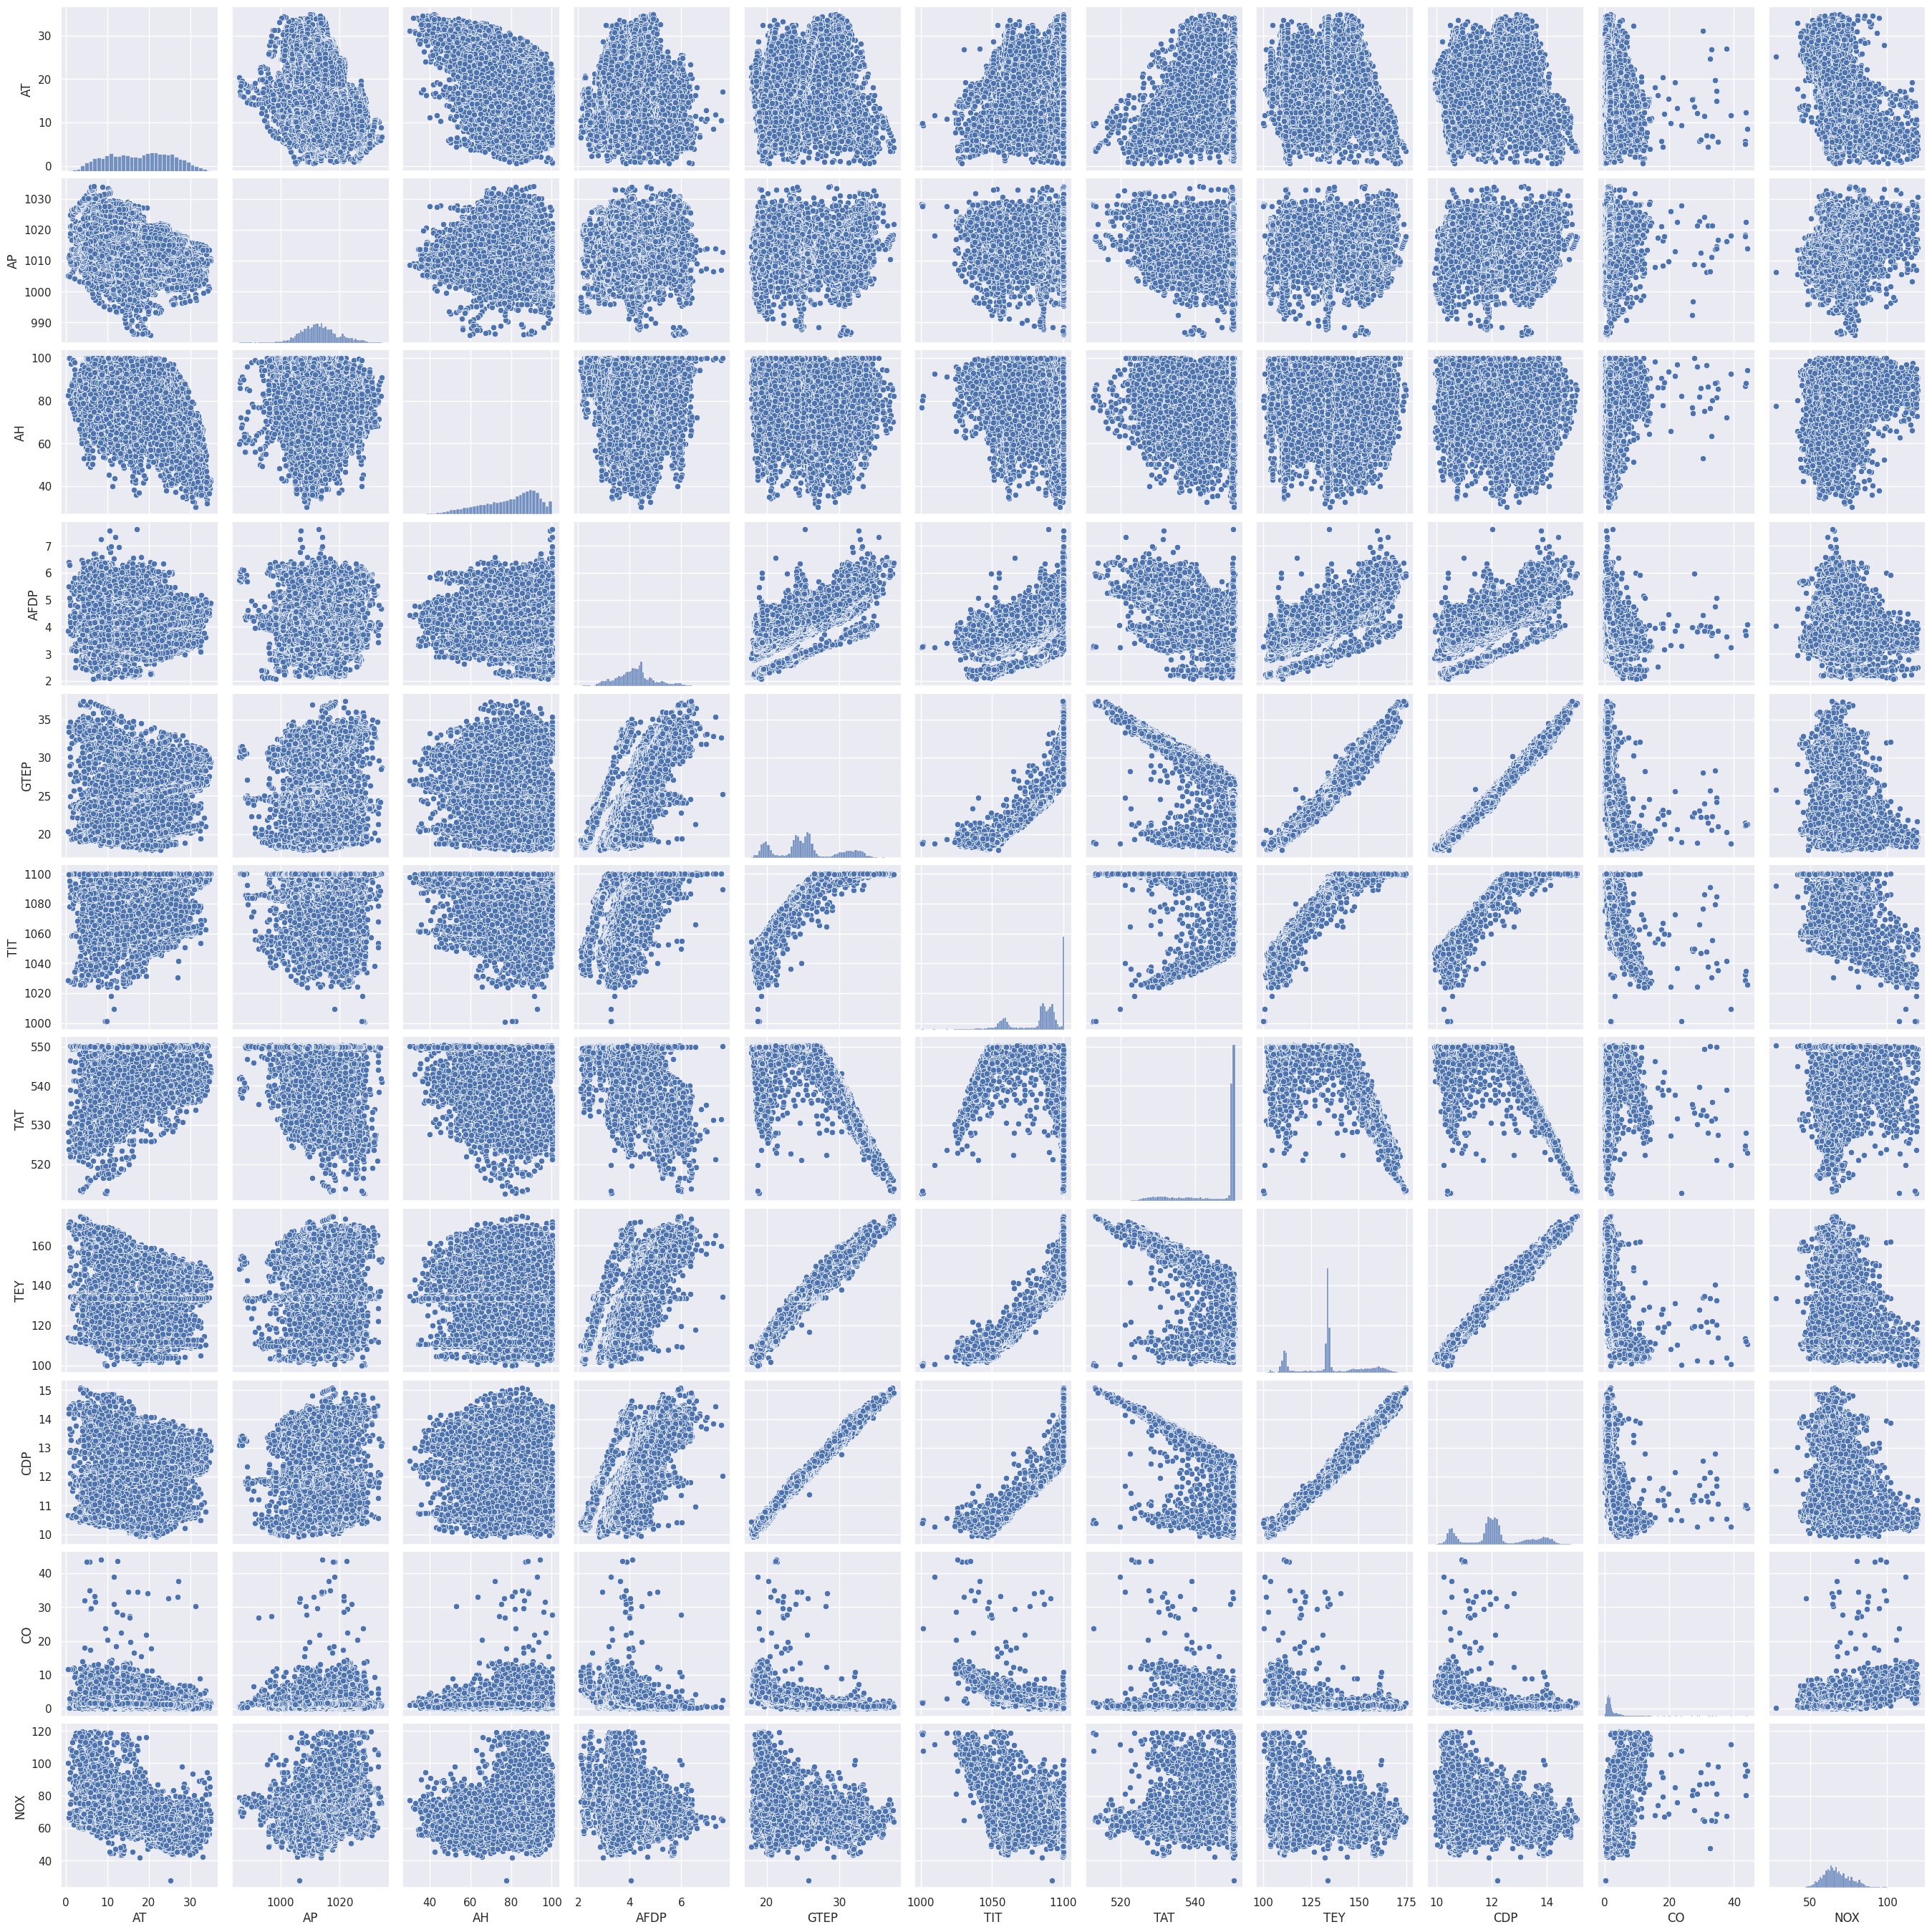

In [28]:
sns.pairplot(raw)

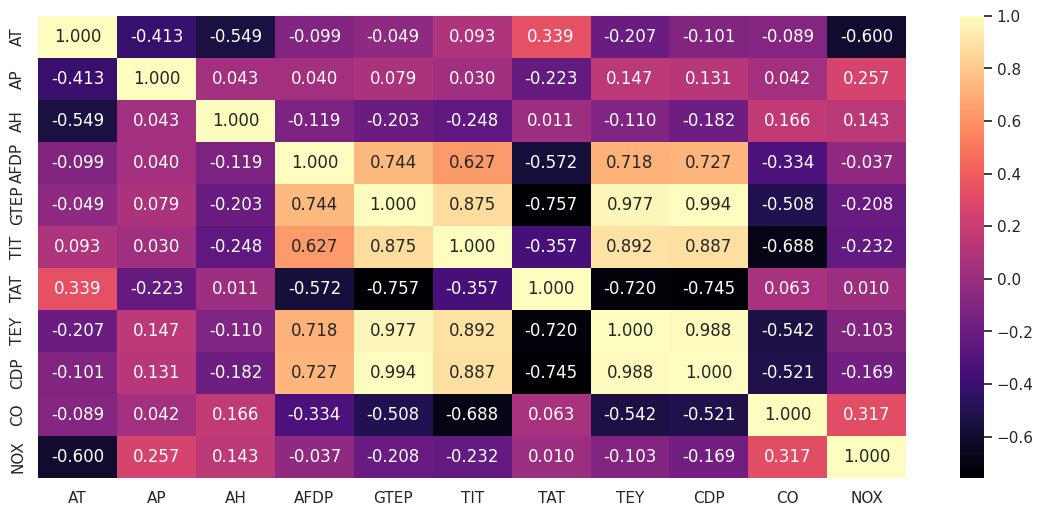

In [29]:
plt.figure(figsize = (14, 6));
sns.heatmap(raw.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [4]:
#TEY is the variable we should predict.
df = raw.copy()
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

AT      AP      AH     TEY
0  6.8594  1007.9  96.799  114.70
1  6.7850  1008.4  97.118  114.72
2  6.8977  1008.8  95.939  114.71
3  7.0569  1009.2  95.249  114.72
4  7.3978  1009.7  95.150  114.72

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
df.describe()

AT           AP            AH           TEY
count  15039.000000  15039.00000  15039.000000  15039.000000
mean      17.764381   1013.19924     79.124174    134.188464
std        7.574323      6.41076     13.793439     15.829717
min        0.522300    985.85000     30.344000    100.170000
25%       11.408000   1008.90000     69.750000    127.985000
50%       18.186000   1012.80000     82.266000    133.780000
75%       23.862500   1016.90000     90.043500    140.895000
max       34.929000   1034.20000    100.200000    174.610000

In [7]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [9]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [11]:
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)
len(xtrain_scale)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


10527

In [12]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 2s 11ms/step - loss: 0.0761 - mse: 0.0761 - mae: 0.2120 - val_loss: 0.0472 - val_mse: 0.0472 - val_mae: 0.1551
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0472 - mse: 0.0472 - mae: 0.1583 - val_loss: 0.0470 - val_mse: 0.0470 - val_mae: 0.1577
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0467 - mse: 0.0467 - mae: 0.1553 - val_loss: 0.0464 - val_mse: 0.0464 - val_mae: 0.1537
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1538 - val_loss: 0.0463 - val_mse: 0.0463 - val_mae: 0.1572
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0460 - mse: 0.0460 - mae: 0.1537 - val_loss: 0.0463 - val_mse: 0.0463 - val_mae: 0.1593
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0466 - mse: 0.0466 - mae: 0.1592 - val_loss: 0.0455 - val_mse: 0.0455 - val_mae: 0.1523
Epoch 7/100
48/48 [==

In [13]:
#At epoch 50, mse and mae just keeps oscillating back a
model1.summary()
y_predict = model1.predict(xtest_scale)
print(hist1.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
141/141 [==============================] - 0s 2ms/step
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [14]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

loss       mse       mae  val_loss   val_mse   val_mae  epoch
95  0.040567  0.040567  0.161870  0.040584  0.040584  0.160087     95
96  0.040599  0.040599  0.161009  0.040562  0.040562  0.159753     96
97  0.040521  0.040521  0.160948  0.040714  0.040714  0.160150     97
98  0.040898  0.040898  0.161597  0.040129  0.040129  0.158918     98
99  0.040336  0.040336  0.160531  0.040192  0.040192  0.159446     99

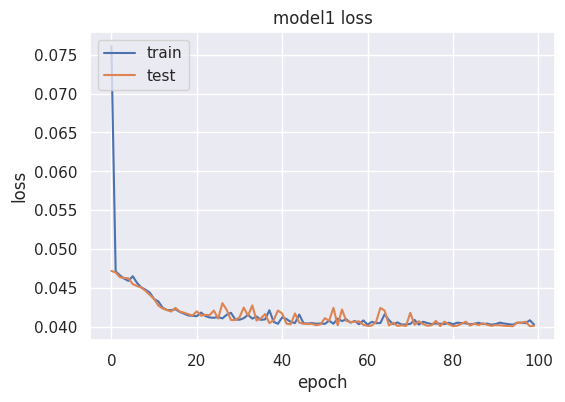

In [15]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

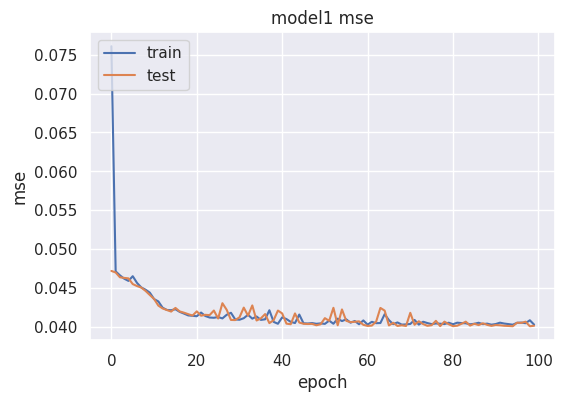

In [16]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()